In [1]:
## include the source file (if you have not downloaded as a package)

include("../src/Chebyshev.jl")
import .Chebyshev as CH

include("../src/Gegenbauer.jl")
import .Gegenbauer as GE

include("../src/SpectralRadialODE.jl")
import .RadialODE as RODE

In [64]:
import Plots
using LaTeXStrings
using Plots
#using PyPlot
using LinearAlgebra
#using GenericSchur
using SparseArrays

In [3]:
T=Float64

rmin=T(-1.);
rmax=T(1.);
nr=20;


In [4]:
pts = CH.cheb_pts(rmin, rmax, nr);

In [5]:
sqr_func = pts.^2;

In [6]:
cube_func = pts.^3;

In [7]:
sqr_spec = CH.to_cheb(sqr_func);

In [8]:
pts_spec = CH.to_cheb(pts);

In [9]:
cube_spec = CH.to_cheb(cube_func);

In [10]:
sin_func = [sin(p) for p in pts];
cos_func = [cos(p) for p in pts];
sin_sqr_func = [sin(p).^2 for p in pts];

In [11]:
sin_spec = CH.to_cheb(sin_func);
cos_spec = CH.to_cheb(cos_func);
sin_sqr_spec = CH.to_cheb(sin_sqr_func);

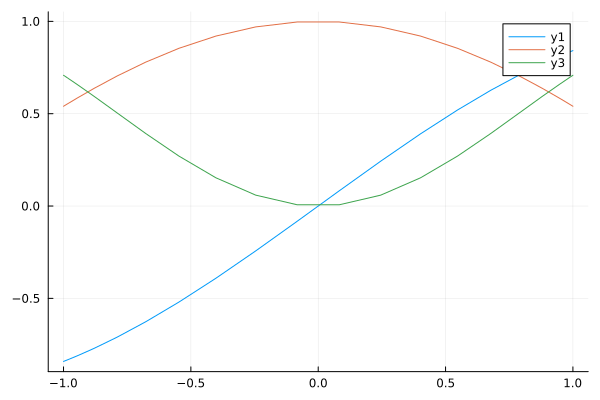

In [12]:
plot(pts,sin_func)
plot!(pts,cos_func)
plot!(pts,sin_sqr_func)

# First test multiplication matrix

In [13]:
CH.

LoadError: syntax: incomplete: premature end of input

In [14]:
M_multiply = CH.mat_C1_X(sin_spec);

In [15]:
CH.to_real(M_multiply*sin_spec)-sin_sqr_func

20-element Vector{Float64}:
 -5.551115123125783e-16
  1.1102230246251565e-16
  1.4432899320127035e-15
 -1.6653345369377348e-15
  1.1102230246251565e-16
  2.220446049250313e-16
 -7.216449660063518e-16
  1.5265566588595902e-15
 -3.885780586188048e-16
  3.2959746043559335e-17
  2.194425197110661e-16
 -4.787836793695988e-16
 -2.220446049250313e-16
  1.3877787807814457e-15
 -2.3314683517128287e-15
  1.5543122344752192e-15
 -7.771561172376096e-16
 -1.3322676295501878e-15
 -8.881784197001252e-16
  1.4432899320127035e-15

# Test derivative

In [16]:
D1 = CH.mat_C1_D1(T,nr);

In [17]:
D2 = GE.compute_D(T,nr,2);

In [18]:
S1 = GE.compute_S(T,nr,1);
S0 = GE.compute_S(T,nr,0);

In [19]:
maximum(D2*cos_spec+S1*S0*cos_spec)

1.6844226906144652e-14

In [20]:
CH.C1_to_real(D1*sin_spec)-cos_func

20-element Vector{Float64}:
 -1.099120794378905e-14
 -3.9745984281580604e-14
  1.176836406102666e-14
  1.9206858326015208e-14
 -2.6867397195928788e-14
  2.1538326677728037e-14
 -1.84297022087776e-14
  3.219646771412954e-15
  1.1324274851176597e-14
 -9.880984919163893e-15
  1.2989609388114332e-14
 -2.6756374893466273e-14
  3.4083846855992306e-14
 -2.7755575615628914e-14
  8.770761894538737e-15
  1.3100631690576847e-14
 -2.6756374893466273e-14
  4.773959005888173e-15
  3.7969627442180354e-14
  7.661116740997898e-9

In [21]:
CH.C1_to_real(D1*sqr_spec)-2*pts

20-element Vector{Float64}:
 -8.859579736508749e-14
  2.7977620220553945e-14
 -4.6629367034256575e-15
 -2.9753977059954195e-14
  3.397282455352979e-14
 -2.19824158875781e-14
  1.532107773982716e-14
 -2.6645352591003757e-15
 -8.992806499463768e-15
  4.912736883966318e-15
 -6.161737786669619e-15
  1.8762769116165146e-14
 -2.55351295663786e-14
  1.9095836023552692e-14
 -8.881784197001252e-16
 -1.3322676295501878e-14
  1.9539925233402755e-14
 -1.7541523789077473e-14
  1.3766765505351941e-14
 -3.5704772471945034e-13

In [22]:
CH.C1_to_real(D1*cube_spec)-3*sqr_func

20-element Vector{Float64}:
  9.636735853746359e-14
 -3.197442310920451e-14
  5.773159728050814e-15
  2.7977620220553945e-14
 -3.6415315207705135e-14
  2.55351295663786e-14
 -2.2537527399890678e-14
  9.270362255620057e-15
  7.105427357601002e-15
 -6.7931771319251766e-15
  8.93729534823251e-15
 -1.9068080447937064e-14
  2.892130979148533e-14
 -2.8199664825478976e-14
  9.547918011776346e-15
  9.103828801926284e-15
 -1.3322676295501878e-14
  7.993605777301127e-15
  8.43769498715119e-15
  5.981881656680343e-13

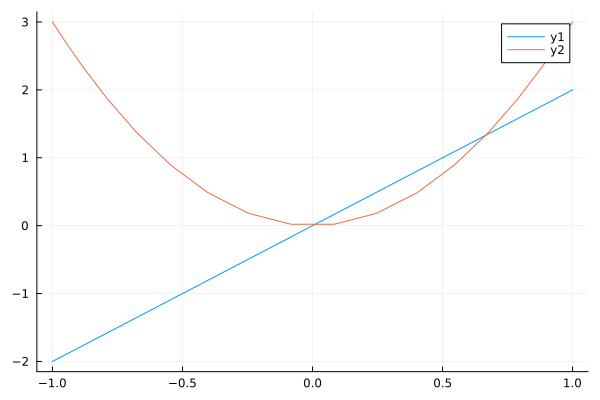

In [23]:
plot(pts,CH.C1_to_real(D1*sqr_spec))
plot!(pts,CH.C1_to_real(D1*cube_spec))


# Teukolsky Radial ODE

In [45]:
T=Float64

nr=28  # number of radial points
nl=3  # number of angular points
s=-2   # field spin
m=2    # m angular value
l=2    # l angular value
a=T(0.0)  # dimensionless black hole spin 
## QNM value near n=0,l=2,m=2, s=-2 for dimensionless spin a=0.7

omega_0= T(0.30105345461250427)-T(0.47827698322307044)*im
gamma = T(4)-T(0)*im
bhm = T(1)
rmin = T(0)
rmax = T(bhm)

1.0

In [95]:
S1 = GE.compute_S(T,nr,1);
S0 = GE.compute_S(T,nr,0);

In [96]:
radial_mat = Matrix(RODE.radial_discretized_eqn_c(nr,s,m,a,bhm,omega_0,gamma,rmin,rmax));

In [116]:
S1_inv = sparse(inv(Matrix(S1)));
S0_inv = sparse(inv(Matrix(S0)))

28×28 SparseMatrixCSC{Float64, Int64} with 210 stored entries:
⠑⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕
⠀⠀⠑⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕⢕
⠀⠀⠀⠀⠑⢕⢕⢕⢕⢕⢕⢕⢕⢕
⠀⠀⠀⠀⠀⠀⠑⢕⢕⢕⢕⢕⢕⢕
⠀⠀⠀⠀⠀⠀⠀⠀⠑⢕⢕⢕⢕⢕
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢕⢕⢕
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢕

the matrix is nonsingular

In [92]:
radial_mat\(1e-16*ones(ComplexF64,nr))

28-element Vector{ComplexF64}:
     4.11770450510056e-8 + 2.8439875783689076e-8im
     7.33956295920753e-8 - 8.777365881089719e-8im
   1.8316700448530963e-8 + 1.0486404732196265e-8im
  -7.898344388347851e-10 - 3.0409747073197592e-9im
   1.0390021799691032e-9 + 7.576044218414939e-10im
  -2.702795088957652e-10 - 3.181310688707583e-10im
  1.1280022505884915e-10 + 6.30499177103444e-11im
 -4.2393809780490245e-11 - 2.6282058522635366e-11im
  1.2340735722170687e-11 + 5.213964612400397e-12im
  -5.119277955404271e-12 - 1.2619646204604011e-12im
   1.315439479553239e-12 + 4.830887781258525e-13im
  -4.114906371376027e-13 + 3.503024925405605e-14im
  1.4500069436792892e-13 + 3.1654184581673026e-14im
                         ⋮
  -2.194506063032423e-15 - 9.929865401682974e-17im
  -6.622162549794205e-16 - 1.2819054148397772e-17im
 -2.5640723977235546e-16 + 6.729867506710327e-16im
  2.2398612673413984e-16 + 1.582676662147322e-16im
   1.474621034252335e-16 + 3.3311588395538655e-17im
  5.2184984909949895e

In [83]:
Id = sparse(I, nr, nr)
Id +=D1

28×28 Matrix{ComplexF64}:
 1.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
    ⋮                             ⋱     ⋮                  
 0.0+0.0im  0.0+0

In [84]:
Id\ones(ComplexF64,nr)

28-element Vector{ComplexF64}:
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
     ⋮
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im
 1.0 - 0.0im

In [60]:
radial_mat[:,1]

28-element SparseArrays.SparseVector{ComplexF64, Integer} with 2 stored entries:
  [1 ]  =  -4.40651+6.80674im
  [2 ]  =  0.302463+1.1519im

In [54]:
rhs = zeros(ComplexF64, 14)

14-element Vector{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [56]:
radial_mat \ rhs

LoadError: ArgumentError: matrix type SparseArrays.SparseMatrixCSC{ComplexF64, Integer}not supported. Try lu(convert(SparseMatrixCSC{Float64/ComplexF64,Int}, A)) for sparse floating point LU using UMFPACK or lu(Array(A)) for generic dense LU.

In [49]:
28*28

784

# An easy application

In [ ]:
heatmap(I, color=:grays, aspect_ratio=1)